<a href="https://colab.research.google.com/github/Nav1504/Data-Analysis-Projects/blob/main/Copy_of_Gloabal_Energy_Consumption_%26_Renewable_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction
 Top 20 countries where used to compare both renewable and non-renewable sources. 4 datasets are used to make the analysis.The renewables power generation dataset includes a 1927-2017 timeline that outlines the progress of the following energy sectors: Hydro,Wind, Biofuel, Solar PV and Geothermal. \

 In addition,the dataset includes the national data for each of the renewable categories as outlined above. The last 2 datasets include the global TWh generated from renewable and non-renwable sources. \
Also two datsets which contain the global consumption figures on national and continental/international group levels, is an extra information about the quantity of energy required, how that is changing over time, and how we are doing in terms of transitioning from non-renewable to renewable.

# Source
Renewable Energy: Reddy Vamsi, Kalananda, Aala, Komanapalli, Narayana. " Nature Inspired Optimization Algorithms for Renewable Energy Generation, Distribution and Management- A Comprehensive Review.2022 \
Consumption: https://yearbook.enerdata.net/total-energy/world-consumption-statistics.html (data converted from mTOE to TWh)

# Insights
* 1. Understanding which countries are leading the renewable sector and which require more immediate transformations will help target efforts and hopefully, reach global goals.
* 2. Which types of renewables are improving the fastest?
* 3. Separates countries by types of renewables
* 4. How long will be take to meet global demands and eliminate non-renewables, or at least reached the 50%
* 5. Does COVID 19 are impacting the global energy comsumption?

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels as sm
from statsmodels.tsa import seasonal
import scipy




/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [11]:
from warnings import filterwarnings
sns.set()
plt.style.use('seaborn-dark-palette')
filterwarnings('ignore')

# Continent energy consumption
**What is energy consumption?**is the amount of energy or power used. There are four organizations in the dataset: OECD,BRICS,CIS,and Middle-East.
Continents number=6

In [14]:
energ_cont_comps=pd.read_csv('/content/Continent_Consumption_TWH.csv')
energ_cont_comps

,Year,World,OECD,BRICS,Europe,North America,Latin America,Asia,Pacific,Africa,Middle-East,CIS
0,1990,101855.54,52602.49,26621.07,20654.88,24667.23,5373.06,24574.19,1197.89,4407.77,2581.86,16049.40
1,1991,102483.56,53207.25,26434.99,20631.62,24841.68,5500.99,24783.53,1186.26,4535.70,2744.68,15898.21
2,1992,102588.23,53788.75,25993.05,20189.68,25341.77,5628.92,25690.67,1209.52,4582.22,3081.95,14339.79
3,1993,103646.56,54614.48,26283.80,20189.68,25830.23,5675.44,26876.93,1267.67,4721.78,3349.44,13246.57
4,1994,104449.03,55579.77,25993.05,20085.01,26365.21,5989.45,28098.08,1279.30,4803.19,3640.19,11606.74
5,1995,107112.30,56754.40,26946.71,20713.03,26714.11,6024.34,29761.17,1290.93,5000.90,3744.86,11188.06
6,1996,109763.94,58417.49,27481.69,21445.72,27295.61,6303.46,30772.98,1372.34,5152.09,3814.64,10850.79
7,1997,110903.68,59022.25,27446.80,21341.05,27574.73,6570.95,31435.89,1407.23,5280.02,4058.87,10373.96
8,1998,111450.29,59219.96,27528.21,21503.87,27772.44,6803.55,31331.22,1442.12,5431.21,4082.13,10152.99
9,1999,113974.00,60301.55,28319.05,21306.16,28528.39,6989.63,32412.81,1477.01,5559.14,4244.95,10373.96


In [15]:
energ_cont_comps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           31 non-null     int64  
 1   World          31 non-null     float64
 2   OECD           31 non-null     float64
 3   BRICS          31 non-null     float64
 4   Europe         31 non-null     float64
 5   North America  31 non-null     float64
 6   Latin America  31 non-null     float64
 7   Asia           31 non-null     float64
 8   Pacific        31 non-null     float64
 9   Africa         31 non-null     float64
 10  Middle-East    31 non-null     float64
 11  CIS            31 non-null     float64
dtypes: float64(11), int64(1)
memory usage: 3.0 KB


From the table above let's separate Organizations and continents as you can see on the code below

In [16]:
continent_name=list(set(energ_cont_comps.columns)-set(['World','OECD','CIS','Middle-East','BRICS','Year']))
organization_name=['OECD','CIS','Middle-East','BRICS']
organization_name

['OECD', 'CIS', 'Middle-East', 'BRICS']

World Energy Consumption

In [17]:
energ_cont_comps.set_index('Year', inplace=True)

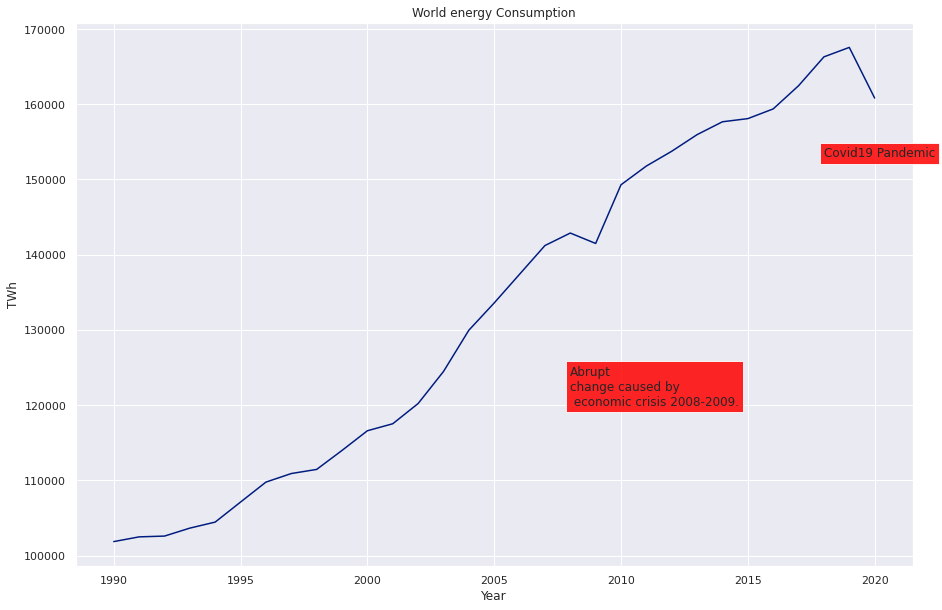

In [18]:
g=energ_cont_comps.World.plot(figsize=(15,10), title='World energy Consumption')
g.text(2008, 120000, 'Abrupt\nchange caused by\n economic crisis 2008-2009.', bbox=dict(facecolor='red', alpha=0.85))
g.text(2018, 153000, 'Covid19 Pandemic', bbox=dict(facecolor='red', alpha=0.85))

plt.ylabel('TWh')
plt.show()

ON the graph we can observed that the world energy consumption increased each year but when COVID started on 2018 started decreased.

How about Growth rate?

In [19]:
world_eccr=energ_cont_comps.World.pct_change().mul(100)
world_eccr

Year
1990         NaN
1991    0.616579
1992    0.102133
1993    1.031629
1994    0.774237
1995    2.549827
1996    2.475570
1997    1.038356
1998    0.492869
1999    2.264427
2000    2.295918
2001    0.798005
2002    2.285997
2003    3.541022
2004    4.410391
2005    2.792196
2006    2.855650
2007    2.776367
2008    1.177730
2009   -0.968661
2010    5.515371
2011    1.667056
2012    1.294920
2013    1.437216
2014    1.096197
2015    0.265545
2016    0.816597
2017    1.933742
2018    2.362374
2019    0.755298
2020   -4.018880
Name: World, dtype: float64

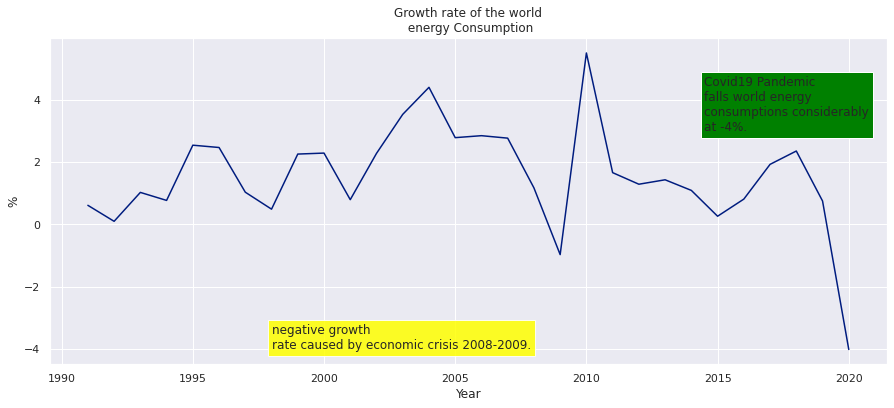

In [20]:
gg=world_eccr.plot(figsize=(15,6), title='Growth rate of the world\n energy Consumption')
gg.text(1998, -4, 'negative growth\nrate caused by economic crisis 2008-2009.', bbox=dict(facecolor='yellow',alpha=0.85))
gg.text(2014.5, 3, 'Covid19 Pandemic\nfalls world energy\nconsumptions considerably\nat -4%.', bbox=dict(facecolor='green'))

plt.ylabel('%')
plt.show()

There are two periods where the change rates of world energy consumption varies between 0 and 4%, these intervals are 1990 - 2008, and 2010 - 2019.

The intervals with negative values correspond to 2009 and 2020.

The pandemic started on 2018 and we can see how the world energy consumption  fell off considerably.

The period of 2008 and 2010, higlights the economic crisis caused by the low oil prices.

In [21]:
decompose_wec = seasonal.seasonal_decompose(energ_cont_comps.World, freq=10)

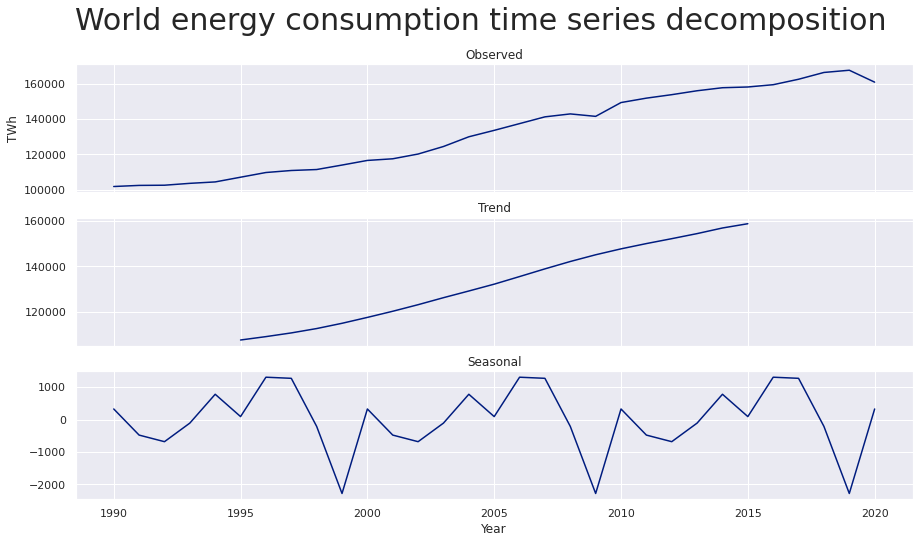

In [22]:
_, axc = plt.subplots(3, 1, figsize=(15, 8), sharex=True) 
plt.suptitle('World energy consumption time series decomposition', fontsize=30)
decompose_wec.observed.plot(ax=axc[0], title='Observed')
decompose_wec.trend.plot(ax=axc[1], title='Trend')
decompose_wec.seasonal.plot(ax=axc[2], title='Seasonal')
axc[0].set_ylabel('TWh')
plt.show()

It was observed that the world energy consumption drops every 10 years.

# Organization energy consumption
WE can group countries per organizations such as Brazil, Rusia, India, China and South Africa are under the BRICS organization.

In [23]:
organization=energ_cont_comps[organization_name]
organization

,OECD,CIS,Middle-East,BRICS
Year,,,,
1990,52602.49,16049.40,2581.86,26621.07
1991,53207.25,15898.21,2744.68,26434.99
1992,53788.75,14339.79,3081.95,25993.05
1993,54614.48,13246.57,3349.44,26283.80
1994,55579.77,11606.74,3640.19,25993.05
1995,56754.40,11188.06,3744.86,26946.71
1996,58417.49,10850.79,3814.64,27481.69
1997,59022.25,10373.96,4058.87,27446.80
1998,59219.96,10152.99,4082.13,27528.21


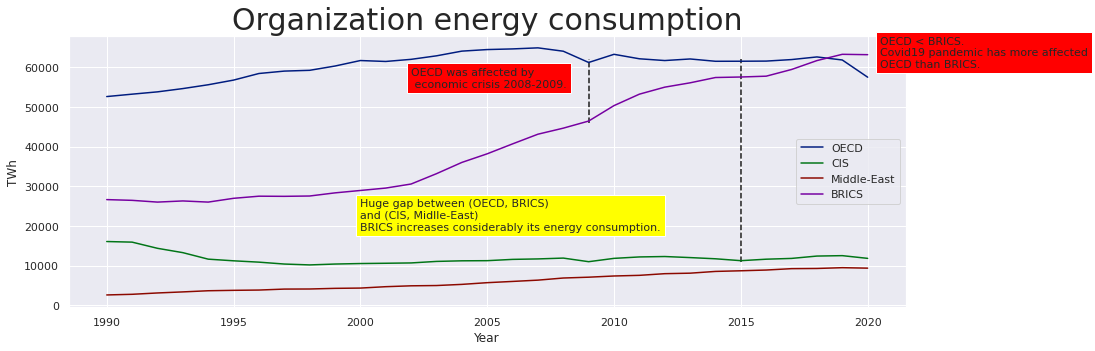

In [24]:
org = organization.plot(figsize=(15,5))
plt.ylabel('TWh')
org.text(2020.5, 60000, 'OECD < BRICS.\nCovid19 pandemic has more affected\nOECD than BRICS.', 
         bbox=dict(facecolor='red'), fontsize=11)
org.text(2000, 19000, 
'Huge gap between (OECD, BRICS)\nand (CIS, Midlle-East)\nBRICS increases considerably its energy consumption.',
         bbox=dict(facecolor='yellow'), fontsize=11)
org.text(2002, 55000, 'OECD was affected by\n economic crisis 2008-2009.',
         bbox=dict(facecolor='red'), fontsize=11)
plt.vlines(2015, 11000, 62000, linestyles='dashed')
plt.vlines(2009, 46000, 62000, linestyles='dashed')
plt.title('Organization energy consumption', fontsize=30)
plt.show()

We can observed that the organizations who consumes more energy are OECD and BRICS

In [25]:
organization.corr().style.background_gradient('PuOr')

,OECD,CIS,Middle-East,BRICS
OECD,1.000000,-0.605396,0.579156,0.488856
CIS,-0.605396,1.000000,-0.181752,-0.036594
Middle-East,0.579156,-0.181752,1.000000,0.986791
BRICS,0.488856,-0.036594,0.986791,1.000000


from Pearson correlation we can observed the following:
* Middle-East  and BRICS have the same energy consumption the correlation coeeficient are closed to 1.
* OECD and CIS have low consumption on energy and the correlation coefficient are lower than 0.5.
* Example:China Chinas Oil from Saudi Arabia and Turkey buys from Gazprom Russia.

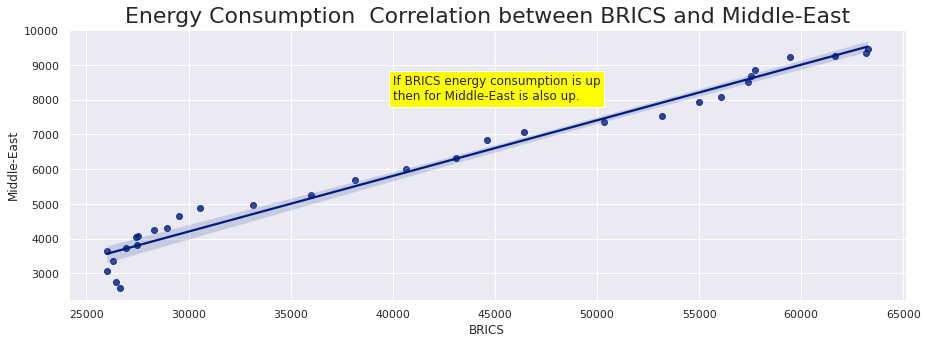

In [26]:
plt.figure(figsize=(15,5))
sns.regplot(x='BRICS', y='Middle-East', data=organization)
plt.text(40000, 8000, 'If BRICS energy consumption is up\nthen for Middle-East is also up.',
         bbox=dict(facecolor='yellow'), fontsize=12)
plt.title('Energy Consumption  Correlation between BRICS and Middle-East', fontsize=22)
plt.show()

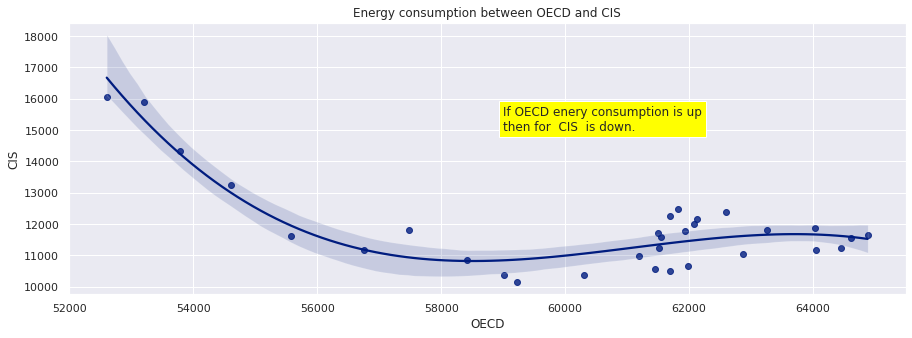

In [28]:
plt.figure(figsize=(15, 5))
sns.regplot(x='OECD', y='CIS', data=organization, order=3)
plt.text(59000, 15000, 'If OECD enery consumption is up\nthen for  CIS  is down.', 
         bbox=dict(facecolor='yellow'), fontsize=12)
plt.title('Energy consumption between OECD and CIS')
plt.show()


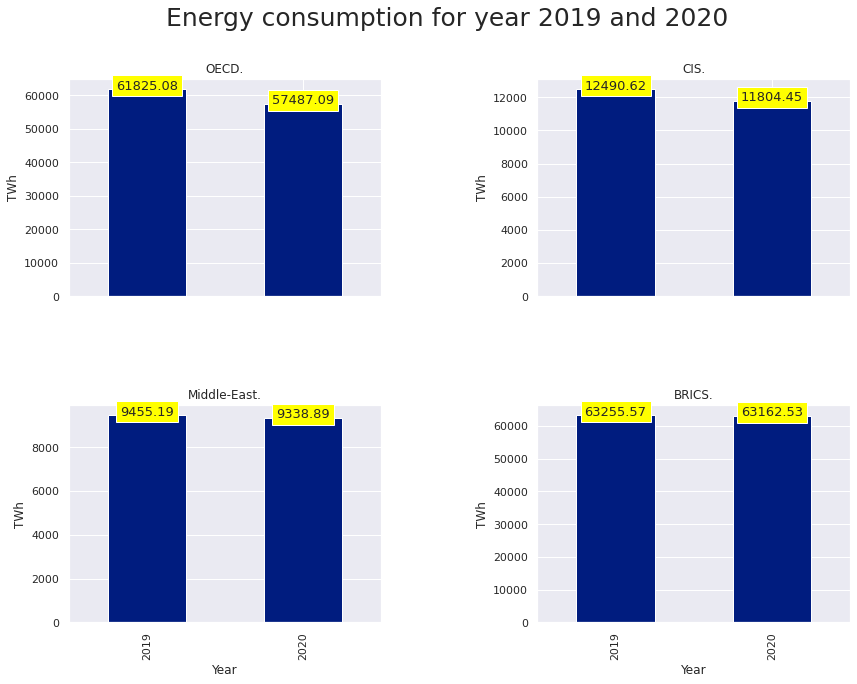

In [31]:
fig = plt.figure(figsize=(14, 10))
fig.subplots_adjust(wspace=0.5, hspace=0.5)
d_org = organization[organization.index.isin([2019, 2020])]
for i, u in enumerate(organization_name):
    ax = fig.add_subplot(2, 2, i+1)
    d_org[u].plot(kind='bar', title=f'{u}.', ax=ax, sharex=True)
    ax.set_ylabel('TWh')
    for i, a in enumerate(d_org[u].tolist()):
        ax.text(i, a, str(round(a, 2)), ha='center', bbox=dict(facecolor='yellow'), fontsize=13)
    #ax.text(2019, 40000, str(cr))
plt.suptitle('Energy consumption for year 2019 and 2020', fontsize=25)
plt.show()

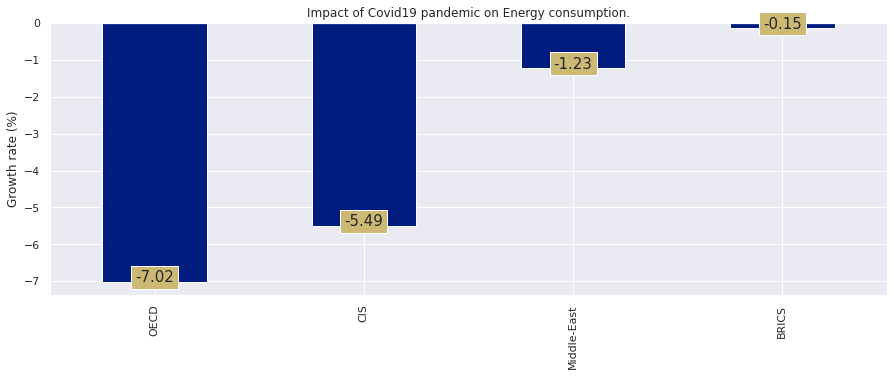

In [34]:
crg = d_org.pct_change().mul(100).iloc[-1]
crg.plot.bar(title='Impact of Covid19 pandemic on Energy consumption.', figsize=(15,5))
plt.ylabel('Growth rate (%)')
for i, a in enumerate(crg):
    plt.text(i, a, str(round(a,2)), ha='center', bbox=dict(facecolor='y'), fontsize=15)
plt.show()